In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from settings import PROJECT_PATH

In [2]:
print(PROJECT_PATH)

/home/lukaszsus/Developer/master_thesis/gaze-estimation


In [3]:
experiments_file_path = os.path.join(PROJECT_PATH, "experiments_files", "experiments.pickle")
with open(experiments_file_path, 'rb') as file:
    df_results = pickle.load(file)

In [4]:
df_results.columns

Index(['id', 'name', 'Adam_amsgrad', 'Adam_beta_1', 'Adam_beta_2',
       'Adam_decay', 'Adam_epsilon', 'Adam_learning_rate', 'Optimizer',
       'conv_sizes', 'curr_epoch', 'curr_step',
       'data_set_eye_combination_type', 'data_set_eye_im_size',
       'data_set_grayscale', 'data_set_headpose_size', 'data_set_input',
       'data_set_load_function', 'data_set_output', 'data_set_output_size',
       'data_set_path', 'dense_layers', 'dense_sizes', 'dropout', 'epochs',
       'learning_rate', 'loss_name', 'model_cls', 'optimizer_name',
       'person_id', 'sys.gpu.0.free_memory', 'sys.gpu.0.gpu_utilization',
       'sys.gpu.0.total_memory', 'sys.gpu.0.used_memory', 'test_loss',
       'test_mae_0', 'test_mae_1', 'test_mean_absolute_error',
       'test_mean_squared_error', 'train_loss', 'train_mae_0', 'train_mae_1',
       'train_mean_absolute_error', 'train_mean_squared_error', 'SGD_decay',
       'SGD_learning_rate', 'SGD_momentum', 'SGD_nesterov',
       'angle_error_degrees', 'da

In [5]:
df_hysts_one_eye_all_people_separately = df_results[df_results["name"] == "hysts_one_eye_all_people_separately"]

In [6]:
def bar_plot_per_person(df):
    df = df[["person_id", "test_mean_absolute_error"]]
    df = df.dropna()
    df = df.astype({"person_id": int, "test_mean_absolute_error": float})
    df = df.groupby(["person_id"]).min()
    df = df.reset_index()
    
    plt.figure(figsize=(20, 20))
    sns.set(style="whitegrid")
    ax = sns.barplot(x="person_id", y="test_mean_absolute_error", data=df)
    return df

,person_id,test_mean_absolute_error
0,0,0.020354
1,1,0.024388
2,2,0.023797
3,3,0.038273
4,4,0.024203
5,5,0.033457
6,6,0.031821
7,7,0.045797
8,8,0.052135
9,9,0.030772


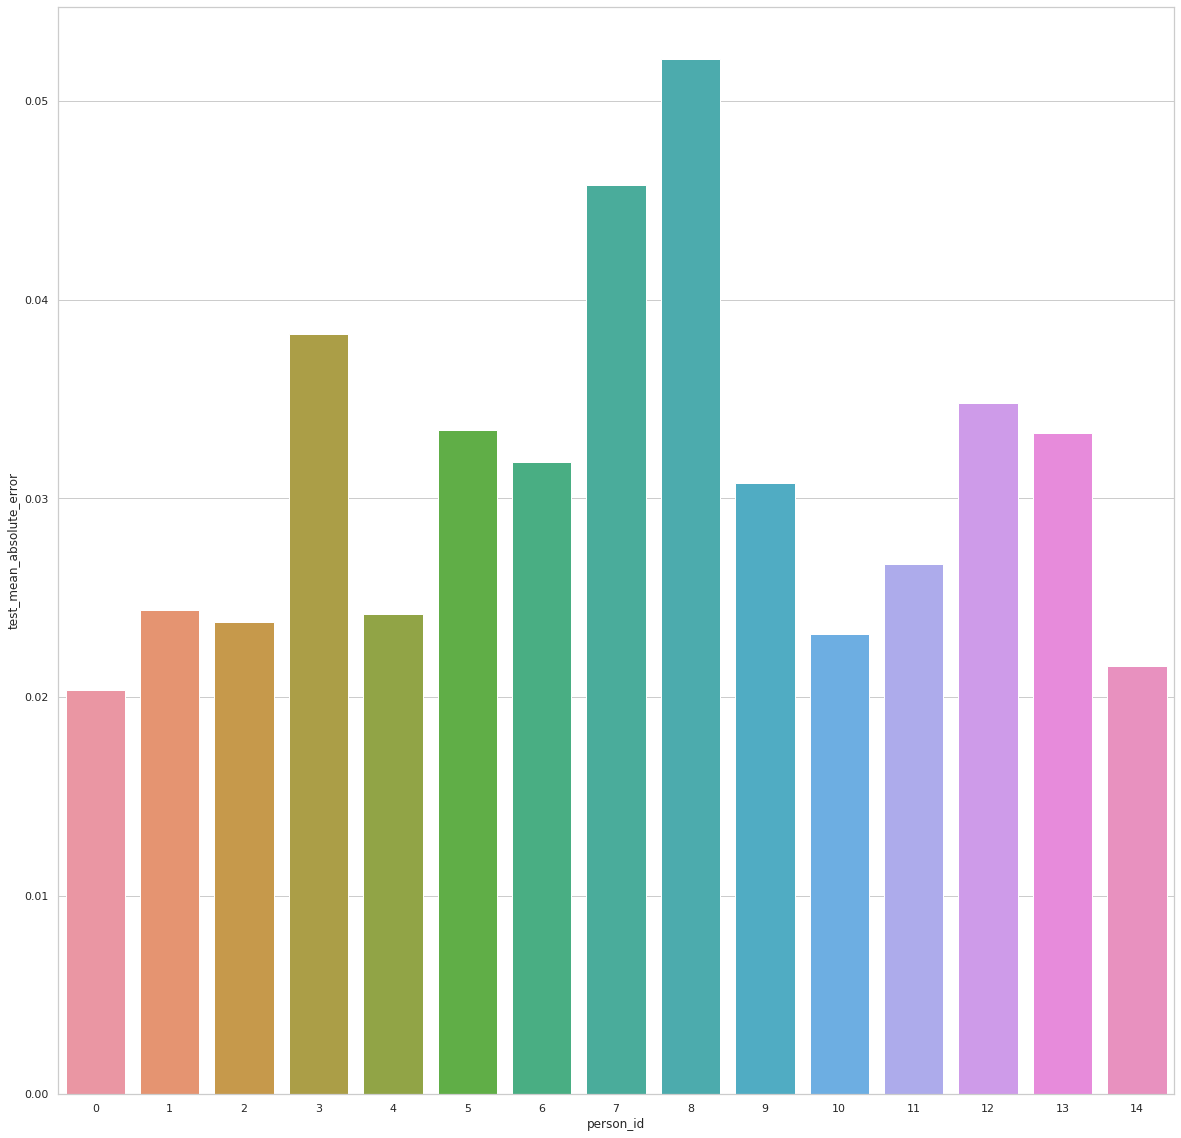

In [7]:
bar_plot_per_person(df_hysts_one_eye_all_people_separately)

In [19]:
df_mpiigaze_both_from_single = df_results[df_results["name"] == "mpiigaze_both_from_single"]

In [25]:
def bar_plot_per_person_from_metric(df):
    df = df.astype({"test_angle_error_degrees": float})
    best_model_row = df[df["test_angle_error_degrees"] == df["test_angle_error_degrees"].dropna().min()]
    metric_name_template = "test_angle_error_degrees_{}"
    
    people_ids = list(range(15))
    values = list()
    for person_id in people_ids:
        values.append(float(best_model_row[metric_name_template.format(person_id)]))
    
    plt.figure(figsize=(20, 20))
    sns.set(style="whitegrid")
    ax = sns.barplot(x=people_ids, y=values)

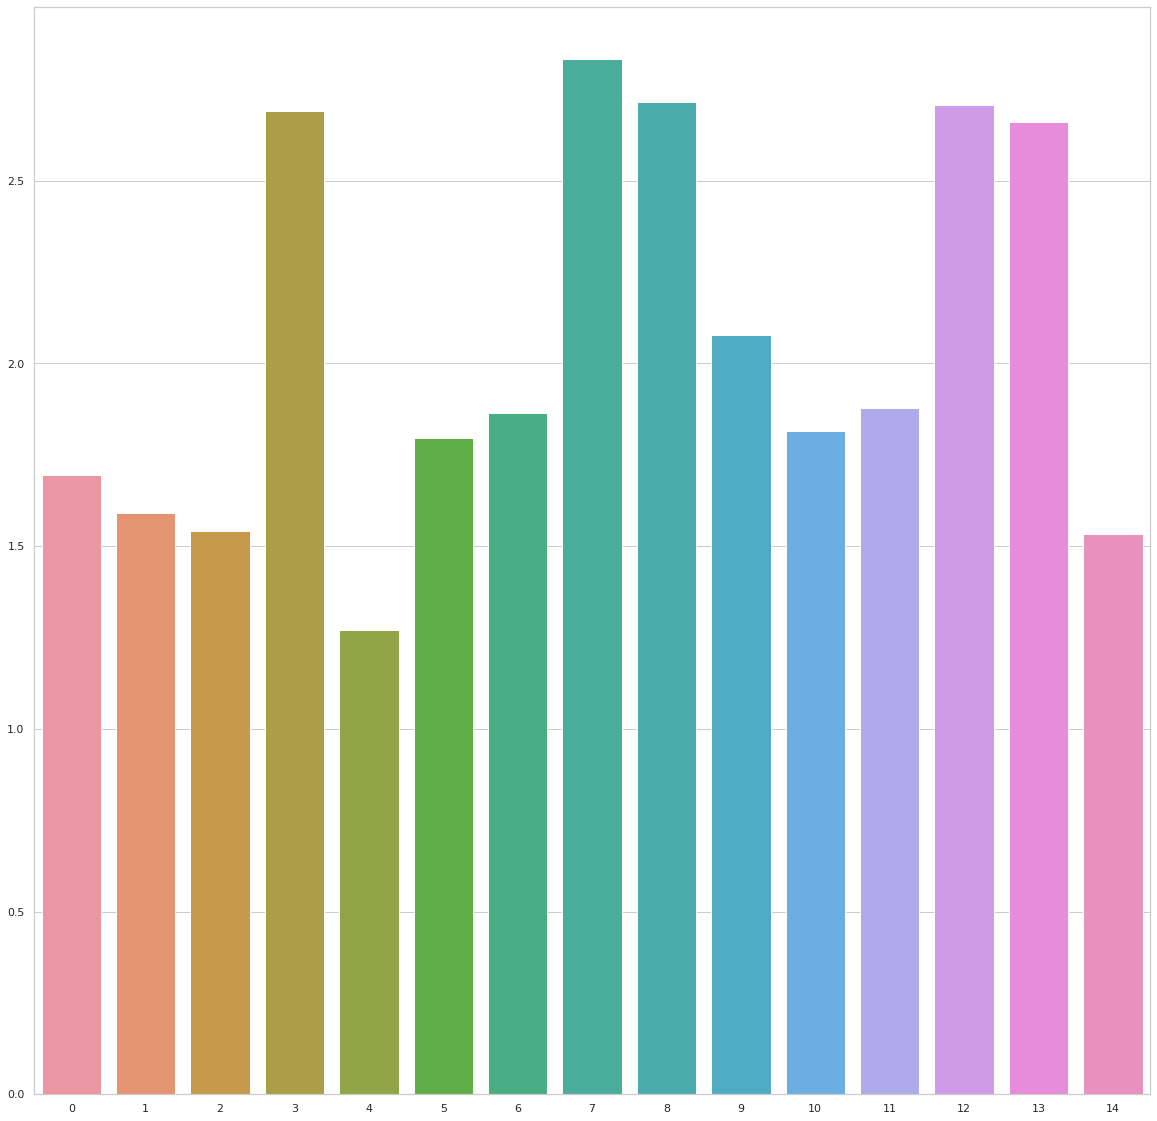

In [26]:
bar_plot_per_person_from_metric(df_mpiigaze_both_from_single)

## Czas przetwarzania

In [58]:
df_time = df_results[df_results["name"] == "mpiigaze_both_landmarks_coords"]
df_time["model_cls"]

3041    Modal3ConvNet
3042    Modal3ConvNet
3043    Modal3ConvNet
3044    Modal3ConvNet
3045    Modal3ConvNet
3046    Modal3ConvNet
3047    Modal3ConvNet
3048    Modal3ConvNet
3049    Modal3ConvNet
3050    Modal3ConvNet
3051    Modal3ConvNet
3052    Modal3ConvNet
3053    Modal3ConvNet
3054    Modal3ConvNet
3055    Modal3ConvNet
3056    Modal3ConvNet
3057    Modal3ConvNet
3058    Modal3ConvNet
3059    Modal3ConvNet
Name: model_cls, dtype: object

In [55]:
df_time = df_time.dropna(subset=["forward_pass_time_gpu"])
df_time = df_time.astype({"forward_pass_time_gpu": float, "train_mean_absolute_error": float})
df_time = df_time[["model_cls", "conv_sizes", "dense_sizes", "forward_pass_time_gpu", "train_mean_absolute_error"]].groupby(["model_cls", "conv_sizes", "dense_sizes"]).mean()
df_time = df_time.reset_index()

In [56]:
df_time

,model_cls,conv_sizes,dense_sizes,forward_pass_time_gpu,train_mean_absolute_error
0,Modal3ConvNet,"[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[256,64,2]",0.005541,0.068696
1,Modal3ConvNet,"[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[512,128,2]",0.005950,0.060524
2,Modal3ConvNet,"[{""n_filters"":16,""filter_size"":[5,5],""padding""...","[256,64,2]",0.006549,0.092066
3,Modal3ConvNet,"[{""n_filters"":16,""filter_size"":[5,5],""padding""...","[512,128,2]",0.005915,0.061498
